In [18]:
import random
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 

this is very basic method to create a random generated 1D array of 10 elements

In [55]:
arr = np.arange(0,10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

this line makes a 2D array by multiplying the 1D array with itself and taking the last digit (mod 10)


In [56]:
result_multiplication_last_digit = np.outer(arr, arr) % 10
# let's see how it looks like
result_multiplication_last_digit

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 2, 4, 6, 8, 0, 2, 4, 6, 8],
       [0, 3, 6, 9, 2, 5, 8, 1, 4, 7],
       [0, 4, 8, 2, 6, 0, 4, 8, 2, 6],
       [0, 5, 0, 5, 0, 5, 0, 5, 0, 5],
       [0, 6, 2, 8, 4, 0, 6, 2, 8, 4],
       [0, 7, 4, 1, 8, 5, 2, 9, 6, 3],
       [0, 8, 6, 4, 2, 0, 8, 6, 4, 2],
       [0, 9, 8, 7, 6, 5, 4, 3, 2, 1]], dtype=int32)

In [104]:
# in order to count the occurrences of each digit, 
# here I am turning that 2D array to its 1D version.
# numpy has an amazing method called flatten() which does that for us :)

result_1d = result_multiplication_last_digit.flatten()
result_1d

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 2,
       4, 6, 8, 0, 2, 4, 6, 8, 0, 3, 6, 9, 2, 5, 8, 1, 4, 7, 0, 4, 8, 2,
       6, 0, 4, 8, 2, 6, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 6, 2, 8, 4, 0,
       6, 2, 8, 4, 0, 7, 4, 1, 8, 5, 2, 9, 6, 3, 0, 8, 6, 4, 2, 0, 8, 6,
       4, 2, 0, 9, 8, 7, 6, 5, 4, 3, 2, 1], dtype=int32)

  Here, we are now left to create a frequency dictionary to count the number of times each number appears in the result_1d array.


In [102]:
counts = dict()

for num in result_1d:
    if num in counts:
        counts[num] += 1
    else:
        counts[num] = 1

print(f'Counts {counts}')

Counts {0: 27, 1: 4, 2: 12, 3: 4, 4: 12, 5: 9, 6: 12, 7: 4, 8: 12, 9: 4}


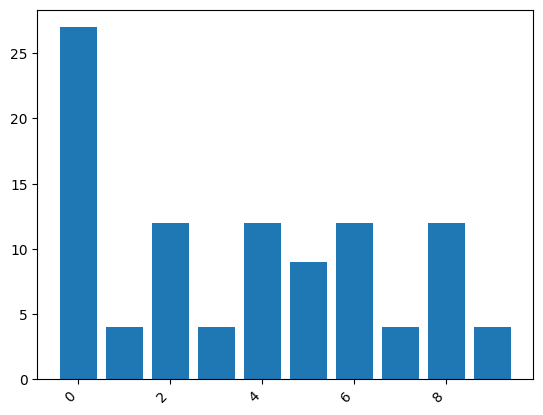

In [105]:
plt.bar(counts.keys(), counts.values())
plt.xticks(rotation=45, ha='right')
plt.show()

 <p> In the bar chart, you can see that the last digit of the multiplication of two numbers is not uniformly distributed some numbers are more likely to appear than others.
<br>
 For example, 0, 2, 4, 5, 6, 8 are more likely to appear than others.
 </p>

---

<p> Now let's see if that is true for the sum of two numbers. In order to do that, I am not going to write all of the code again,instead I will make our code in a modular way so that we can reuse it. </p>

In [ ]:
# Here is the code that I come up with


OPERATION_SUM = np.add.outer
OPERATION_MULTIPLICATION = np.multiply.outer

# This function takes an array and an operation as input and 
# returns the distribution of the last digit of the result of the operation
def last_digit_distribution(arr,operation):
    result_multiplication_last_digit = operation(arr,arr) % 10
    result_1d = result_multiplication_last_digit.flatten()
    counts = dict()

    for num in result_1d:
        if num in counts:
            counts[num] += 1
        else:
            counts[num] = 1

    return counts

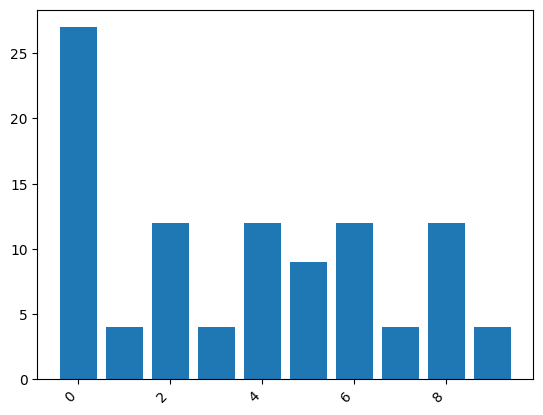

{0: 27, 1: 4, 2: 12, 3: 4, 4: 12, 5: 9, 6: 12, 7: 4, 8: 12, 9: 4}

In [72]:
counts = last_digit_distribution(arr, OPERATION_MULTIPLICATION)
plt.bar(counts.keys(), counts.values())
plt.xticks(rotation=45, ha='right')
plt.show()
counts

You can see that the result is the same as before

---


##### Now lets make the same for **OPERATION_SUM**

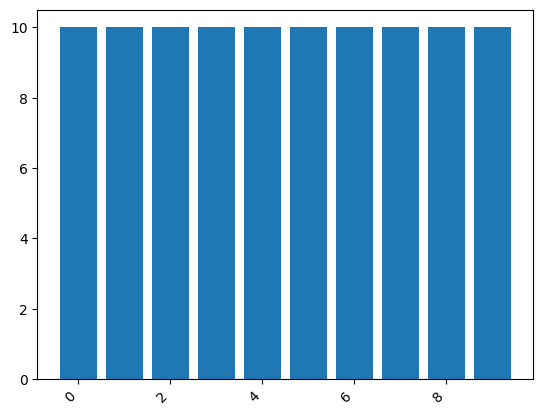

In [73]:
counts = last_digit_distribution(arr, OPERATION_SUM)
plt.bar(counts.keys(), counts.values())
plt.xticks(rotation=45, ha='right')
plt.show()

So in this result, you can see that the last digit of the sum of two numbers is uniformly distributed

---

<p> Now lets make the real world example.
I'll generate random numbers and plot the distribution of the last digits from their multiplication and addition
</p>

In [106]:

def inner_sum(a,b):
    return a+b

def inner_product(a,b):
    return a*b

def last_digit_frequency(num_trials, operation) -> dict:
    last_digit_counts = []

    for _ in range(num_trials):
        a = random.randint(1, 100)
        b = random.randint(1, 100)
        result = operation(a, b)
        last_digit = result % 10
        last_digit_counts.append(last_digit)

    counts = {num: last_digit_counts.count(num) for num in set(last_digit_counts)}

    return counts

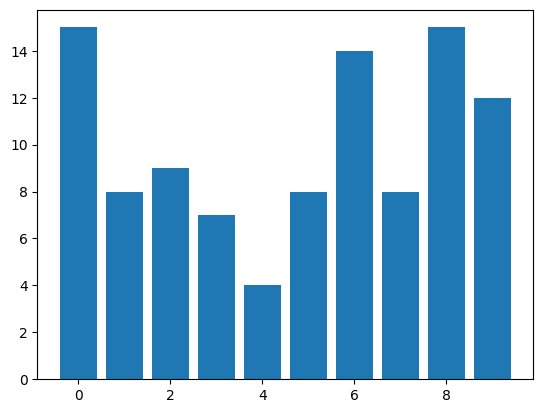

In [107]:
# Lets first test our function with sum operation for 100 trials

TRIALS = 100
last_digit_counts = last_digit_frequency(TRIALS,inner_sum)
plt.bar(last_digit_counts.keys(), last_digit_counts.values())
plt.show()

in the result you can see that the last digit of the sum of two random numbers is not uniformly distributed
<br>
Why?<br>
this is because our trial is too small! we only did 100 trials

----

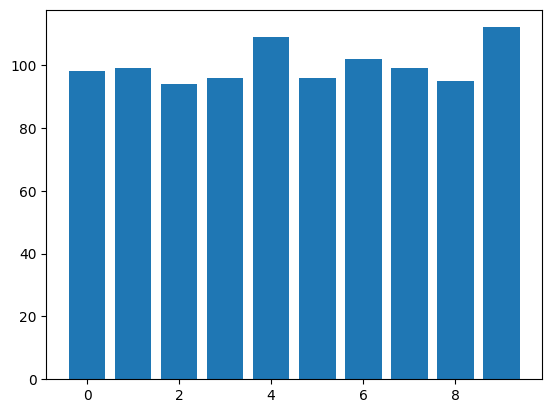

In [84]:
# lets test our experiment with 1000 trials
TRIALS = 1000
last_digit_counts = last_digit_frequency(TRIALS,inner_sum)
plt.bar(last_digit_counts.keys(), last_digit_counts.values())
plt.show()


now you can see that the distribution is getting closer to uniform distribution


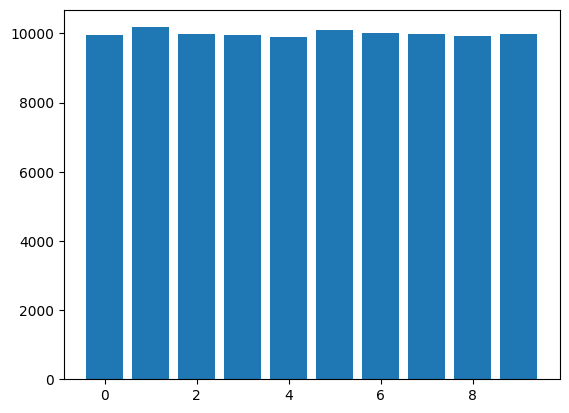

In [92]:
# lets make the same for the for 100000 trials
TRIALS = 100000
last_digit_counts = last_digit_frequency(TRIALS,inner_sum)
plt.bar(last_digit_counts.keys(), last_digit_counts.values())
plt.show()

So you can see it is almost perfect uniform distribution. <br> 
So this proves that the last digit of the sum of two random numbers is uniformly distributed

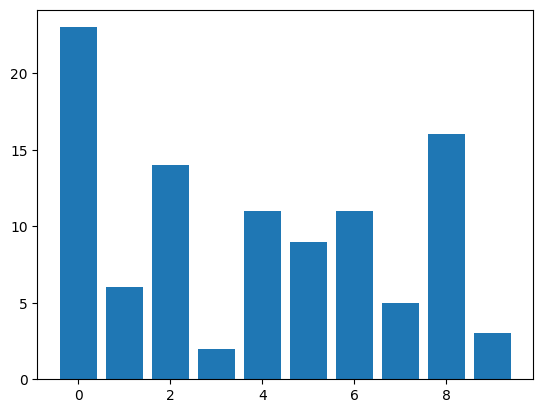

In [97]:
# Let's do the same for the multiplication operation for 100 trials
TRIALS = 100
last_digit_counts = last_digit_frequency(TRIALS,inner_product)
plt.bar(last_digit_counts.keys(), last_digit_counts.values())
plt.show()

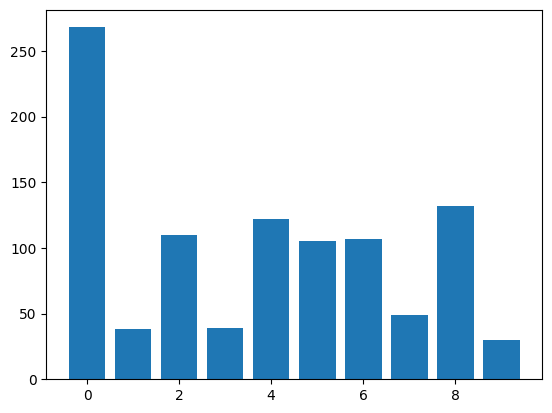

In [98]:
TRIALS = 1000
last_digit_counts = last_digit_frequency(TRIALS,inner_product)
plt.bar(last_digit_counts.keys(), last_digit_counts.values())
plt.show()

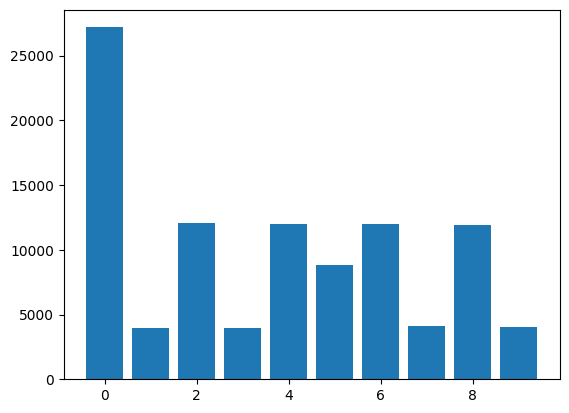

In [99]:
TRIALS = 100000
last_digit_counts = last_digit_frequency(TRIALS,inner_product)
plt.bar(last_digit_counts.keys(), last_digit_counts.values())
plt.show()


you can see that the last digit of the multiplication of two random numbers is not uniformly distributed. <br>
As we saw before, some numbers are more likely to appear than others

### What We Learn from This Notebook

1. **Last Digit Distribution in Multiplication**:
   - When we multiply two numbers, the last digit of the result is **not uniformly distributed**.
   - Some last digits are more likely to appear than others. For example:
     - Last digits **0, 2, 4, 5, 6,** and **8** are more frequently observed.

2. **Last Digit Distribution in Addition**:
   - In contrast, when we add two numbers, the last digit of the result is **uniformly distributed**.
   - All last digits (0 through 9) are **equally likely** to appear.
